# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [64]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [2]:
# Neuer Datensatz
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

# Lesen der CSV Datei:
dataset = pd.read_csv(path + '\dataset_custom.csv')

In [3]:
#Erstellung einer Spalte Zielvariable aus den Raucher-Features (Zusammenführen)
def create_raucher_ziel(row):
    if row['Raucher_nie'] == 1:
        return 1
    elif row['Raucher_ehem'] == 1:
        return 2
    elif row['Raucher_aktiv'] == 1:
        return 3
    else:
        return None  # Oder einen Standardwert, je nach Anforderungen

# Neue Zielspalte erstellen
dataset['Raucher_Ziel'] = dataset.apply(create_raucher_ziel, axis=1)

data = dataset.drop(columns=['Raucher_nie', 'Raucher_ehem', 'Raucher_aktiv'])

# Anforderungen 6: Klassifikation

Führen Sie mit dem Algorithmus Ihrer Wahl eine Klassifikationsaufgabe auf Ihren Daten durch.

Teilen Sie dazu zunächst die Daten auf, um Overfitting beim Trainieren des Algorithmus und bei der Parameterauswahl zu vermeiden. Erklären Sie die gewählte Strategie und die Größenverhältnisse.

In [4]:
# Teilen der Daten mithilfe der "train_test_split"-Funktion, da der Datensatz nach Alter sortiert ist. 
# Somit wird eine Durchmischung der Daten gewährleistet. 

# Aufgrund eines ausreicehnd großen Datensatzes wird erstmal keine Aufteilung nach CrossValidation (CV) benötigt.
# Außerdem ist CV rechenintensiver. Um anfänglich schneller auf Ergebniss zu kommen, wird darauf verzichtet.
# Bei nicht zufriedenstellenden Ergebnissen, wird allerdings auf CV zurückgergiffen

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Raucher_Ziel']), data['Raucher_Ziel'], test_size=0.2, random_state=42)

In [15]:
X_train

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,SGOT_ALT,gamma_GTP,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Trinker
113922,113928,0,55,170,75,89.0,94.0,274.0,44.0,191.0,...,29.0,33.0,25.95,1,0,0,0,0,0,1
511548,511574,1,45,155,50,76.0,87.0,182.0,41.0,126.0,...,10.0,11.0,20.81,1,0,0,0,0,0,0
880869,880921,1,55,150,55,88.8,82.0,240.0,63.0,161.0,...,34.0,27.0,24.44,0,0,0,1,0,0,0
818187,818234,1,20,150,50,67.5,92.0,208.0,62.0,129.0,...,10.0,16.0,22.22,0,1,0,0,0,0,1
109157,109163,0,30,165,60,82.0,85.0,199.0,61.0,101.0,...,21.0,21.0,22.04,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,259197,1,45,160,50,74.0,86.0,192.0,57.0,111.0,...,12.0,9.0,19.53,1,0,0,0,0,0,0
365838,365861,1,40,155,65,86.0,101.0,241.0,73.0,149.0,...,12.0,12.0,27.06,0,1,0,0,0,0,0
131932,131941,1,35,155,60,83.0,84.0,233.0,62.0,134.0,...,20.0,21.0,24.97,0,0,1,0,0,0,0
671155,671195,0,70,170,80,92.0,91.0,131.0,66.0,59.0,...,24.0,23.0,27.68,0,0,0,1,0,0,0


In [20]:
data

,Unnamed: 0,Geschlecht,Alter,Größe,Gewicht,Hüftumfang,Nüchterner Blutzucker,Totale Cholesterin,HDL_Cholesterin,LDL_Cholesterin,...,gamma_GTP,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Trinker,Raucher_Ziel
0,0,0,35,170,75,90.0,99.0,193.0,48.0,126.0,...,40.0,25.95,0,1,0,0,0,0,1,1
1,1,0,30,180,80,89.0,106.0,228.0,55.0,148.0,...,27.0,24.69,0,1,0,0,0,0,0,3
2,2,0,40,165,75,91.0,98.0,136.0,41.0,74.0,...,68.0,27.55,1,0,0,0,0,0,0,1
3,3,0,50,175,80,91.0,95.0,201.0,76.0,104.0,...,18.0,26.12,0,0,0,1,0,0,0,1
4,4,0,50,165,60,80.0,101.0,199.0,61.0,117.0,...,25.0,22.04,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991284,991341,0,45,175,80,92.1,88.0,198.0,46.0,125.0,...,27.0,26.12,1,0,0,0,0,0,0,1
991285,991342,0,35,170,75,86.0,83.0,133.0,40.0,84.0,...,15.0,25.95,0,1,0,0,0,0,0,1
991286,991343,1,40,155,50,68.0,90.0,205.0,96.0,77.0,...,17.0,20.81,1,0,0,0,0,0,1,3
991287,991344,0,25,175,60,72.0,69.0,122.0,38.0,73.0,...,17.0,19.59,1,0,0,0,0,0,0,1


In [18]:
print(X_train['Alter'].min(), X_train['Alter'].max())

20 85


In [19]:
print(X_test['Alter'].min(), X_test['Alter'].max())

20 85


Wählen Sie geeignete Features aus und setzen Sie die Parameter des Algorithmus. Beschreiben Sie das gewälhte Vorgehen für die Auswahl der Features und Parameter. Berichten Sie den Parameterraum und die final gewählten Parameter. Geben Sie die Performanz auf den Trainingsdaten (bzw. Entwicklungsdaten, falls verwendet) an.

In [ ]:
# Ansatz: Feature nach Regression auswählen und mit Hilfe der SelectFromModel-Klasse der feature_selection-Bib.
# --> SelectFromModel lädt zulange, daher vorläufige beschneidung nach Korrelation

In [22]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=1000)
softmax_model.fit(X_train, y_train)


c:\Users\imanu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [25]:
feature_selection = SelectFromModel(softmax_model, threshold='mean')
feature_selection.fit(X_train, y_train)

c:\Users\imanu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                             multi_class='multinomial',
                                             penalty='l1', solver='saga'),
                threshold='mean')

In [26]:
print(feature_selection)

SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                             multi_class='multinomial',
                                             penalty='l1', solver='saga'),
                threshold='mean')


In [27]:
feature_selection.feature_names_in_

array(['Unnamed: 0', 'Geschlecht', 'Alter', 'Größe', 'Gewicht',
       'Hüftumfang', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'Hämoglobin',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Body-Mass-Index',
       'BD_optimal', 'BD_normal', 'BD_Grenzwert_normal',
       'BD_Hypertonie Grad 1', 'BD_Hypertonie Grad 2',
       'BD_Hypertonie Grad 3', 'Trinker'], dtype=object)

In [34]:
feature_selection.get_feature_names_out()

array(['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP'], dtype=object)

In [36]:
joblib.dump(feature_selection, 'Modelle/feature_selection_A6.joblib')

['Modelle/feature_selection_A6.joblib']

In [37]:
loaded_feature_model = joblib.load('Modelle/feature_selection_A6.joblib')
loaded_feature_model.get_feature_names_out()

array(['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP'], dtype=object)

In [38]:
joblib.dump(softmax_model, 'Modelle/softmax_model_1_A6.joblib')

['Modelle/softmax_model_1_A6.joblib']

In [ ]:
X_train_selected = feature_selection.transform(X_train)
X_test_selected = feature_selection.transform(X_test)


### Features Selektieren. Nach dem Select-Model und nach Korrelationen

In [53]:
#Selecht Model: 
sf_model = X_train[['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP']]


sf_model_test = X_test[['Alter', 'Gewicht', 'Nüchterner Blutzucker', 'Totale Cholesterin',
       'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'SGOT_ALT',
       'gamma_GTP']]

#Corr Model 1

sf_corr = X_train[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP']]

sf_corr_test = X_test[['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Hüftumfang', 'Hämoglobin', 'gamma_GTP']]

#Corr Model 2
sf_corr2 = X_train[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin',]]


sf_corr2_test = X_test[['Geschlecht', 'Alter', 'Gewicht',
       'HDL_Cholesterin', 'Triglycerid',
       'gamma_GTP', 'Hämoglobin',]]


In [56]:
sf_corr_3 = X_train[['Geschlecht', 'Alter', 'Gewicht', 'HDL_Cholesterin', 'Triglycerid', 'gamma_GTP', 'Hämoglobin',]]

sf_corr_test_3 = X_test[['Geschlecht', 'Alter', 'Gewicht', 'HDL_Cholesterin', 'Triglycerid', 'gamma_GTP', 'Hämoglobin',]]

Evaluieren Sie die Klassifikation auf den ungesehenen Testdaten. Betrachten Sie Precision und Recall sowie den F-Wert. Welches Maß ist für Ihre Anwendung wichtiger? Bewerten Sie Ihr Ergebnis. Ist es in der Praxis voraussichtlich zufriedenstellend?

In [68]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model.fit(sf_model, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.64


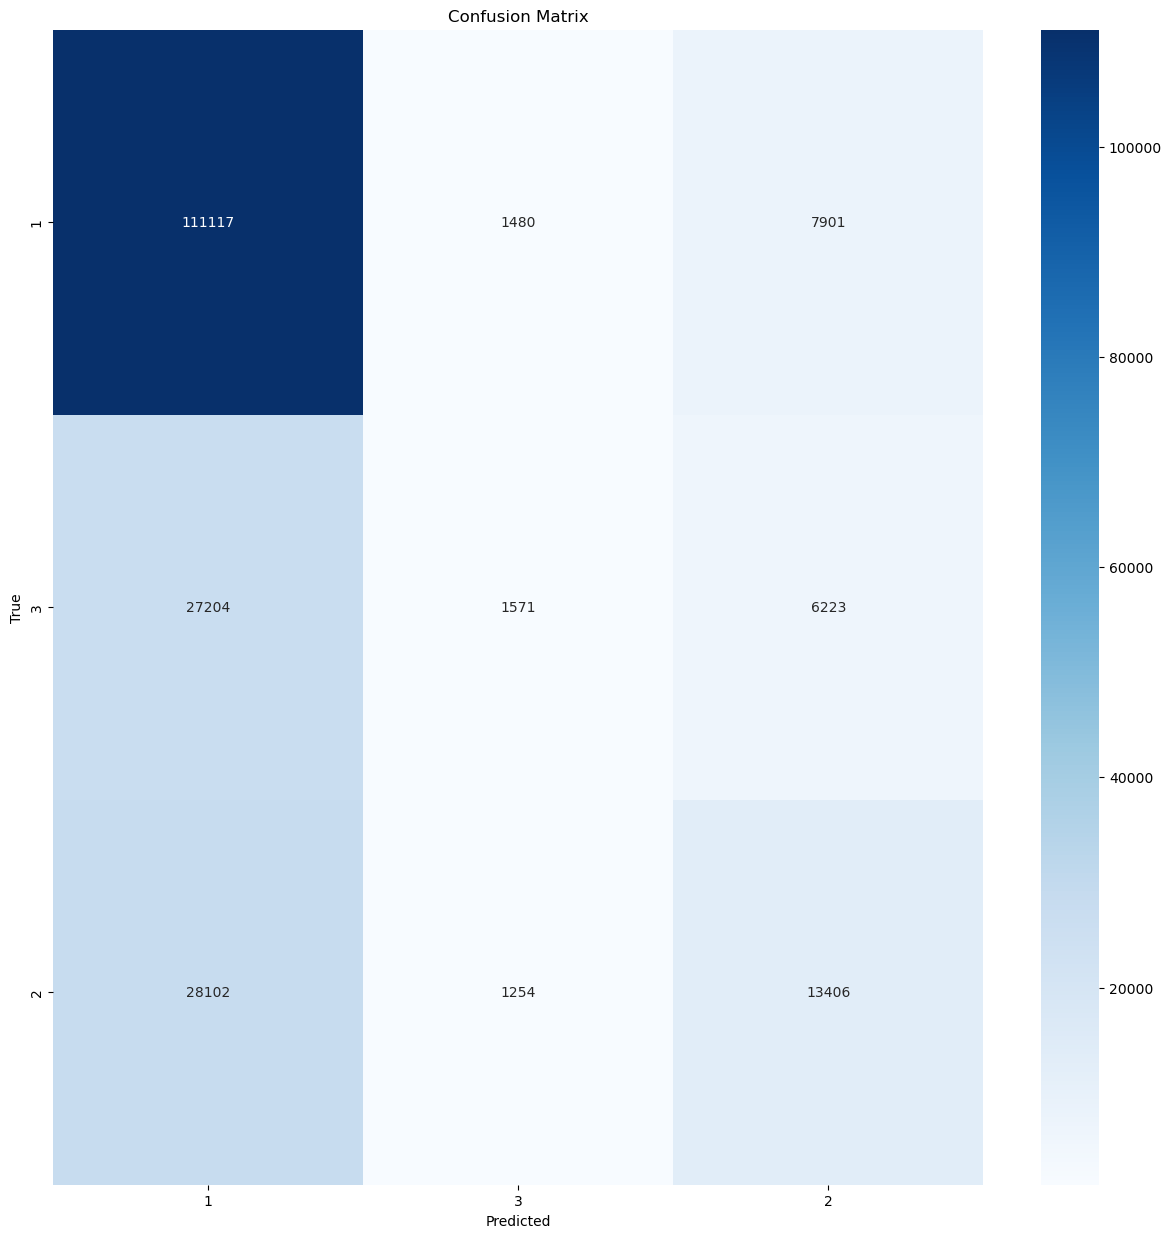

In [69]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_model = softmax_model.predict(sf_model_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_model)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_model)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [71]:
# Precision berechnen
precision = precision_score(y_test, y_pred_model, average='weighted')
print(f'Precision: {precision:.2f}')

# Recall berechnen
recall = recall_score(y_test, y_pred_model, average='weighted')  # Du kannst 'micro', 'macro', oder 'weighted' auswählen
print(f'Recall: {recall:.2f}')

Precision: 0.58
Recall: 0.64


In [31]:
# Zweites Modell
softmax_model_corr = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
softmax_model_corr.fit(sf_corr, y_train)


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

Accuracy: 0.67


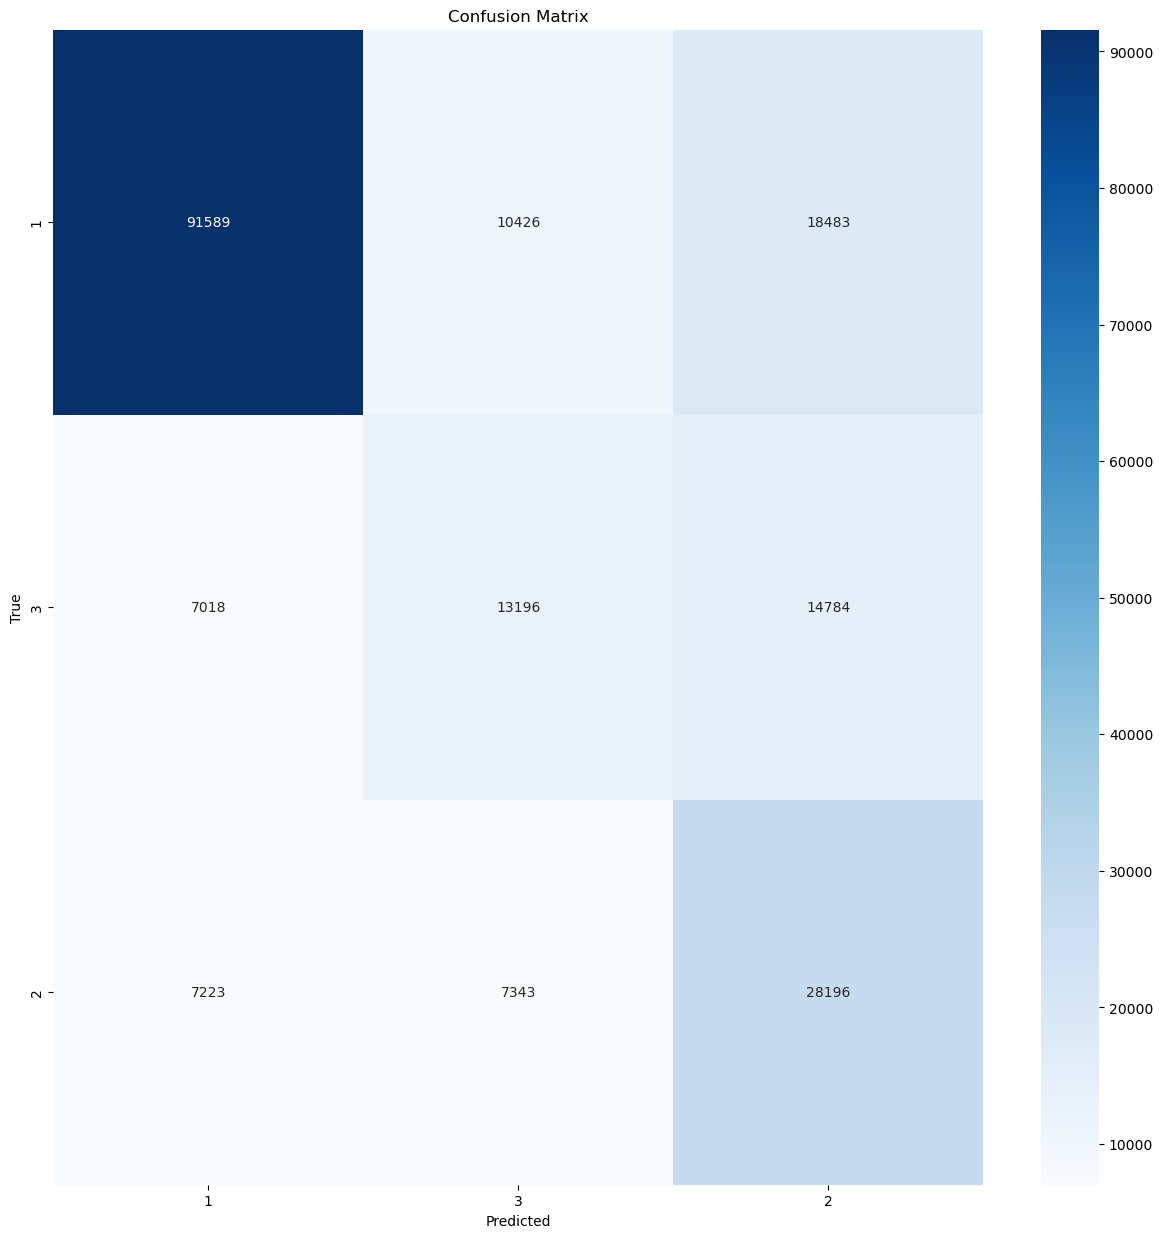

In [52]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_corr = softmax_model_corr.predict(sf_corr_test)

# Validierung
accuracy = accuracy_score(y_test, y_pred_corr)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Precision berechnen
precision = precision_score(y_test, y_pred_corr, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.70


In [65]:
# Recall berechnen
recall = recall_score(y_test, y_pred_corr, average='weighted')  # Du kannst 'micro', 'macro', oder 'weighted' auswählen
print(f'Recall: {recall:.2f}')

Recall: 0.67


# korrelierenden Features führen zu einem besseren Ergebnis

## Versuch drittes Modell zu trainieren. Features zusammensetzung aber komplexer als zuvor deshalb keine echtes Ergebnis

In [46]:
softmax_model_corr_2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
softmax_model_corr_2.fit(sf_corr2, y_train)

c:\Users\imanu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

### Eine weitere Feature-Selektion aus dem korrelierenden und SelectedFeature-Alg dauert ungewöhnlich lange zu trainieren. 

In [54]:
softmax_model_corr2 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)


In [55]:
softmax_model_corr2.fit(sf_corr2, y_train)

c:\Users\imanu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

In [51]:
softmax_model_corr.fit(sf_corr, y_train)

LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

In [60]:
softmax_model_corr_3 = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=2000)
softmax_model_corr_3.fit(sf_corr_3, y_train)

c:\Users\imanu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga')

Accuracy: 0.66


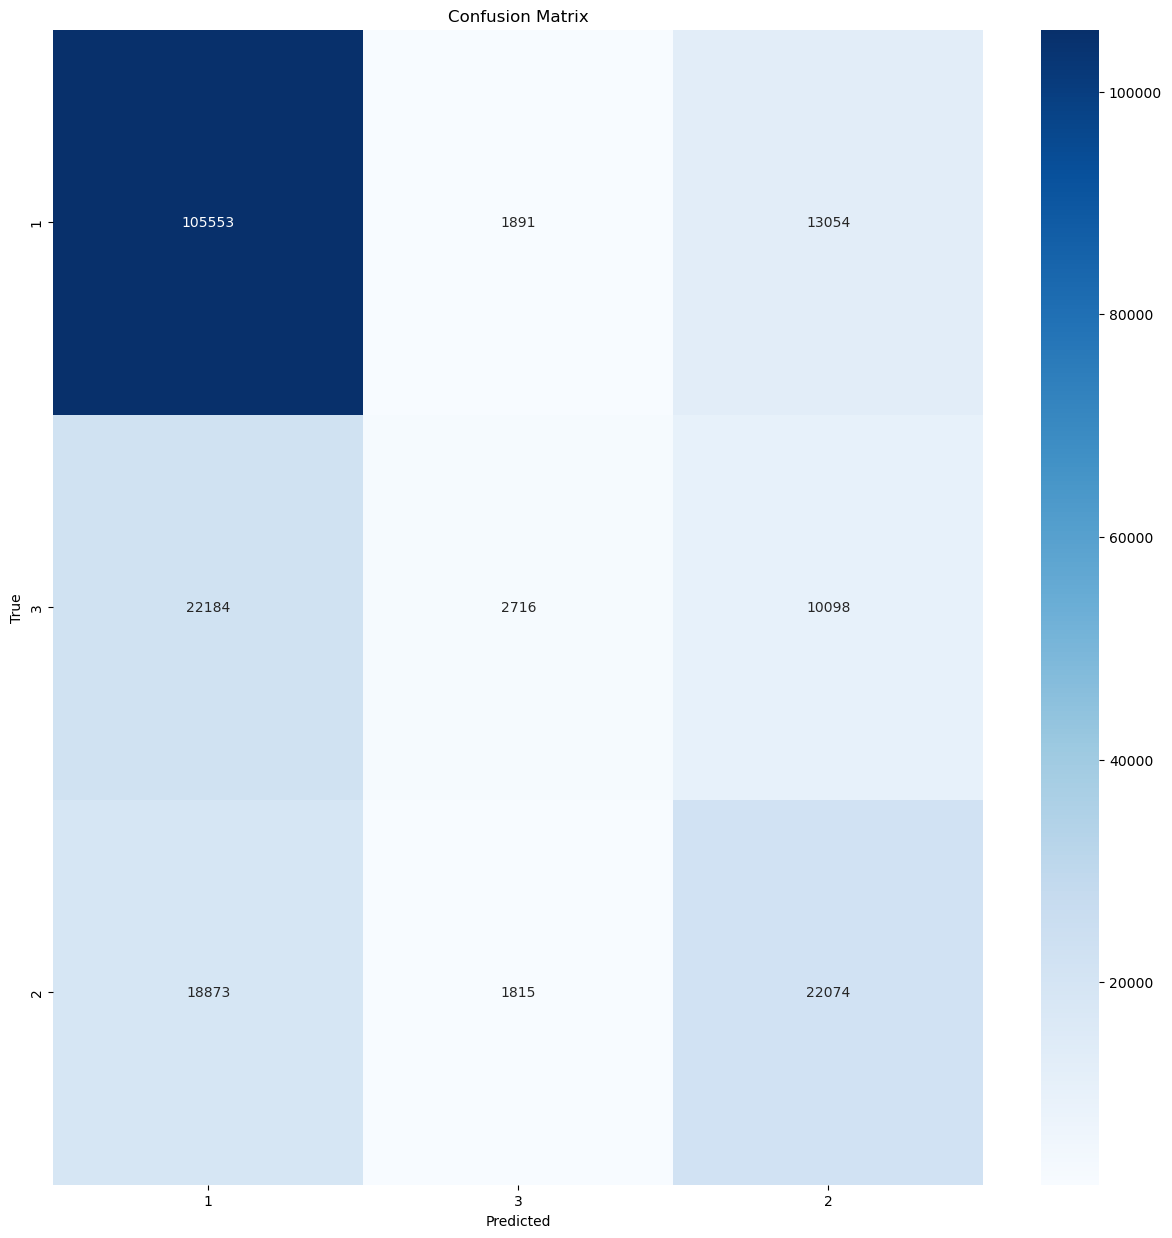

In [67]:
# Vorhersagen auf dem Testset machen (nur für die selektierten Features)

y_pred_corr_3 = softmax_model_corr_3.predict(sf_corr_test_3)

# Validierung
accuracy_3 = accuracy_score(y_test, y_pred_corr_3)
print(f'Accuracy: {accuracy_3:.2f}')

# Confusion Matrix erstellen und anzeigen
cm = confusion_matrix(y_test, y_pred_corr_3)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data['Raucher_Ziel'].unique() , yticklabels=data['Raucher_Ziel'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
softmax_model_corr.pre